<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>


# **SpaceX  Falcon 9 First Stage Landing Prediction**


 ## Hands-on Lab: Complete the EDA with Visualization


Estimated time needed: **70** minutes


In this assignment, we will predict if the Falcon 9 first stage will land successfully. SpaceX advertises Falcon 9 rocket launches on its website with a cost of 62 million dollars; other providers cost upward of 165 million dollars each, much of the savings is due to the fact that SpaceX can reuse the first stage. 

In this lab, you will perform Exploratory Data Analysis and Feature Engineering.


Falcon 9 first stage will land successfully


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/landing_1.gif)


Several examples of an unsuccessful landing are shown here:


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/crash.gif)


Most unsuccessful landings are planned. Space X performs a controlled landing in the oceans. 


  ## Objectives
Perform exploratory Data Analysis and Feature Engineering using `Pandas` and `Matplotlib`

- Exploratory Data Analysis
- Preparing Data  Feature Engineering 


----


Install the below libraries


In [1]:
!pip install pandas
!pip install numpy
!pip install seaborn
!pip install matplotlib

### Import Libraries and Define Auxiliary Functions


We will import the following libraries the lab 



In [2]:
# andas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd
#NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np
# Matplotlib is a plotting library for python and pyplot gives us a MatLab like plotting framework. We will use this in our plotter function to plot data.
import matplotlib.pyplot as plt
#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns

## Exploratory Data Analysis 


First, let's read the SpaceX dataset into a Pandas dataframe and print its summary


In [3]:
df=pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv")

# If you were unable to complete the previous lab correctly you can uncomment and load this csv

# df = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/dataset_part_2.csv')

df.head(5)

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


First, let's try to see how the `FlightNumber` (indicating the continuous launch attempts.) and `Payload` variables would affect the launch outcome.

We can plot out the <code>FlightNumber</code> vs. <code>PayloadMass</code>and overlay the outcome of the launch. We see that as the flight number increases, the first stage is more likely to land successfully. The payload mass is also important; it seems the more massive the payload, the less likely the first stage will return.


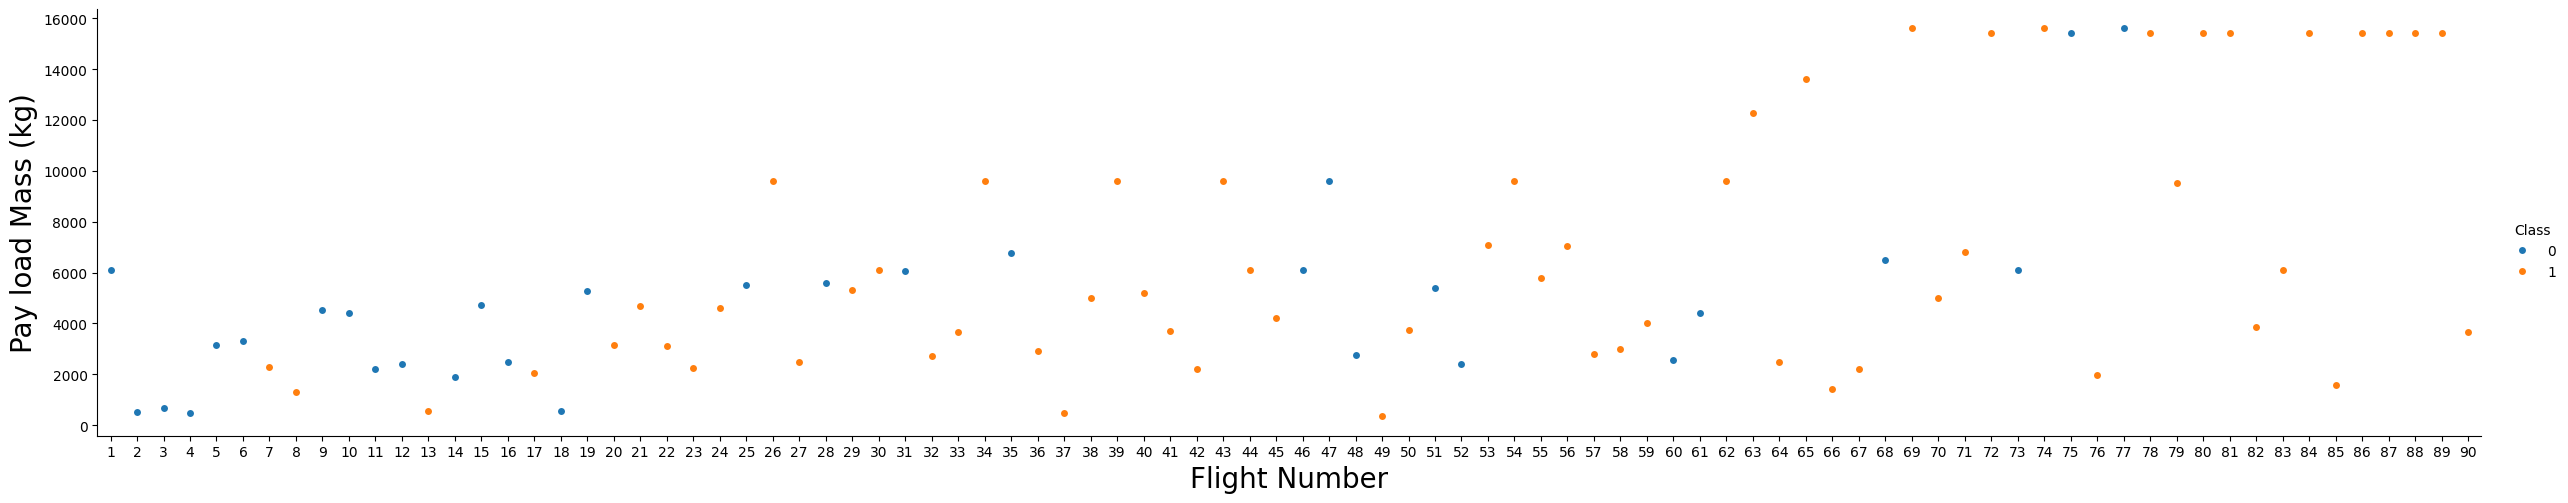

In [4]:
sns.catplot(y="PayloadMass", x="FlightNumber", hue="Class", data=df, aspect = 5)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Pay load Mass (kg)",fontsize=20)
plt.show()

Next, let's drill down to each site visualize its detailed launch records.


### TASK 1: Visualize the relationship between Flight Number and Launch Site


Use the function <code>catplot</code> to plot <code>FlightNumber</code> vs <code>LaunchSite</code>, set the  parameter <code>x</code>  parameter to <code>FlightNumber</code>,set the  <code>y</code> to <code>Launch Site</code> and set the parameter <code>hue</code> to <code>'class'</code>


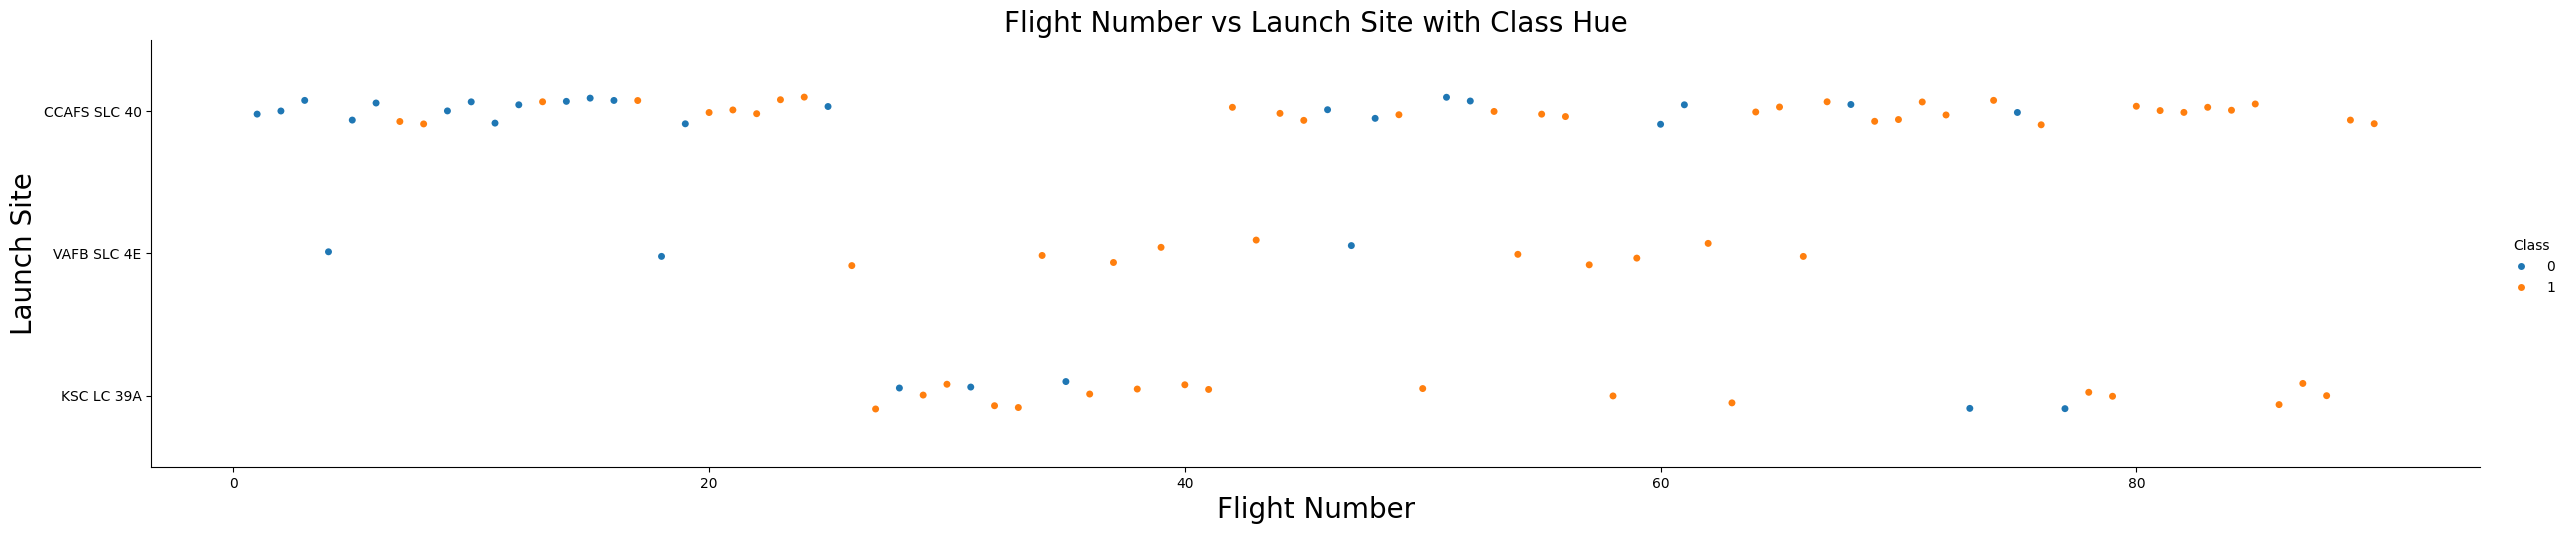

In [5]:
# Plot a scatter point chart with x axis to be Flight Number and y axis to be the launch site, and hue to be the class value

# Using catplot to create a scatter point chart
sns.catplot(y="LaunchSite", x="FlightNumber", hue="Class", data=df, aspect=5, kind="strip")

# Setting the labels and title
plt.xlabel("Flight Number", fontsize=20)
plt.ylabel("Launch Site", fontsize=20)
plt.title("Flight Number vs Launch Site with Class Hue", fontsize=20)

# Display the plot
plt.show()

Now try to explain the patterns you found in the Flight Number vs. Launch Site scatter point plots.


Flight Number Distribution:

The plot shows that flight numbers increase sequentially for each launch site, indicating the chronological order of launches.
As expected, earlier launches (with lower flight numbers) are more scattered across multiple sites, while later launches tend to concentrate on fewer specific sites.

Launch Sites Usage:

Some launch sites appear more frequently across different flight numbers, suggesting they are primary launch sites.
Other launch sites appear less frequently or are clustered only around certain flight numbers, indicating they may have been used for specific missions or during specific periods.

Class Hue (Success vs. Failure):

The hue='Class' parameter distinguishes between successful and unsuccessful launches:
Launch sites with a higher concentration of a specific hue indicate that most launches from that site had consistent outcomes (either mostly successes or mostly failures).
If there’s a mix of both classes at a single site, it indicates variability in launch outcomes from that site.
Sites that show predominantly one hue (e.g., mostly successful or mostly failed launches) may reflect differences in operational efficiency, experience, or mission difficulty.

Possible Trend:

Later flight numbers show an increasing trend of successful launches (Class=1), suggesting improved reliability and performance over time.
This trend could reflect advancements in technology, better operational procedures, or lessons learned from earlier launches.

### TASK 2: Visualize the relationship between Payload and Launch Site


We also want to observe if there is any relationship between launch sites and their payload mass.


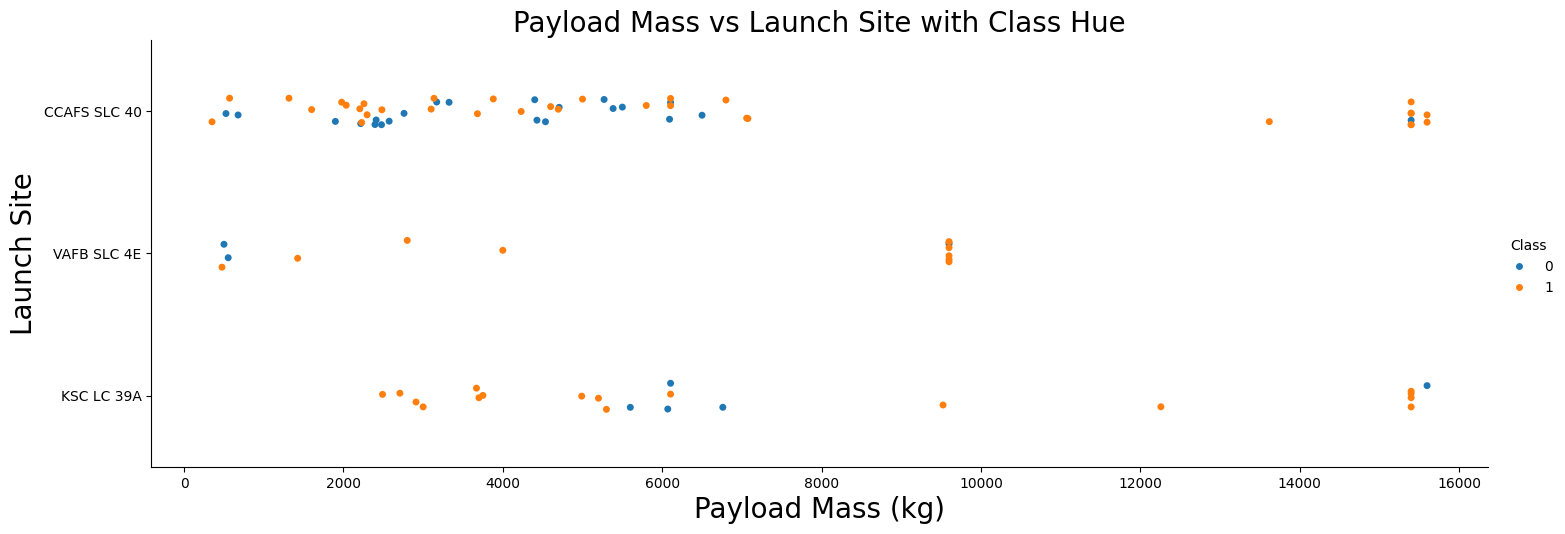

In [6]:
# Plot a scatter point chart with x axis to be Pay Load Mass (kg) and y axis to be the launch site, and hue to be the class value

# Using catplot to create a scatter point chart
sns.catplot(x="PayloadMass", y="LaunchSite", hue="Class", data=df, aspect=3, kind="strip")

# Setting the labels and title
plt.xlabel("Payload Mass (kg)", fontsize=20)
plt.ylabel("Launch Site", fontsize=20)
plt.title("Payload Mass vs Launch Site with Class Hue", fontsize=20)

# Display the plot
plt.show()

Now if you observe Payload Vs. Launch Site scatter point chart you will find for the VAFB-SLC  launchsite there are no  rockets  launched for  heavypayload mass(greater than 10000).


Observation from the Payload vs. Launch Site Scatter Point Chart:

For the VAFB-SLC launch site:

There are no rockets launched with a payload mass greater than 10,000 kg.
All launches from VAFB-SLC appear to have involved payloads below 10,000 kg, suggesting that this site was likely used for missions with medium or light payloads.

Possible Interpretation:

Mission Type:

VAFB-SLC may have been designated for specific types of missions that required launching lighter payloads, such as low Earth orbit (LEO) satellites or other smaller payload missions.

Launch Vehicle Capability:

The rockets launched from VAFB-SLC might not have been designed to carry heavy payloads, unlike those used at other launch sites.

Operational Constraints:

This could also be due to operational constraints, such as differences in infrastructure, geographical location, or mission objectives that required smaller payloads from this site.

### TASK  3: Visualize the relationship between success rate of each orbit type


Next, we want to visually check if there are any relationship between success rate and orbit type.


Let's create a `bar chart` for the sucess rate of each orbit


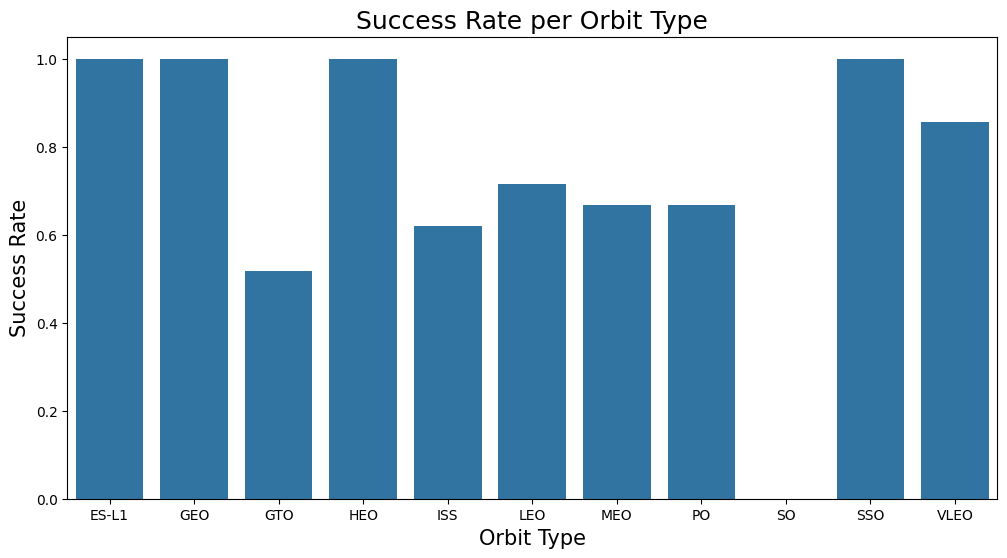

In [7]:
# HINT use groupby method on Orbit column and get the mean of Class column

# Calculate the success rate for each orbit type
success_rate_per_orbit = df.groupby('Orbit')['Class'].mean().reset_index()

# Plotting the bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x='Orbit', y='Class', data=success_rate_per_orbit)

# Setting labels and title
plt.xlabel("Orbit Type", fontsize=15)
plt.ylabel("Success Rate", fontsize=15)
plt.title("Success Rate per Orbit Type", fontsize=18)

# Display the plot
plt.show()

Analyze the ploted bar chart try to find which orbits have high sucess rate.


Analysis of the Plotted Bar Chart:

Orbits with High Success Rate:

The orbits with the highest success rates (close to or equal to 1) are:

GTO (Geostationary Transfer Orbit): This orbit is commonly used for placing satellites into geostationary orbit. The high success rate may be attributed to well-established procedures and technology for these types of missions.

LEO (Low Earth Orbit): This orbit is popular for various purposes such as communication, Earth observation, and scientific missions. Its high success rate reflects the extensive experience in launching into this orbit.

Orbits with Moderate Success Rate:

SSO (Sun-Synchronous Orbit) and PO (Polar Orbit) have a moderate success rate. These orbits are often used for Earth observation satellites, and the slightly lower success rate could indicate more complex mission requirements.

Orbits with Low Success Rate:

The orbits with the lowest success rate are:

ES-L1 (Earth-Sun Lagrange Point 1): This type of mission may have a lower success rate due to the complexity of the trajectory and the longer distance involved in reaching the Lagrange point.

HEO (Highly Elliptical Orbit): Missions to this orbit type are typically more challenging due to the high apogee and the complex maneuvers required.

Conclusion:

GTO and LEO are the most reliable orbits with consistently high success rates.
Missions to more specialized or complex orbits, such as HEO and ES-L1, have lower success rates, likely due to the higher difficulty and risks involved.

### TASK  4: Visualize the relationship between FlightNumber and Orbit type


For each orbit, we want to see if there is any relationship between FlightNumber and Orbit type.


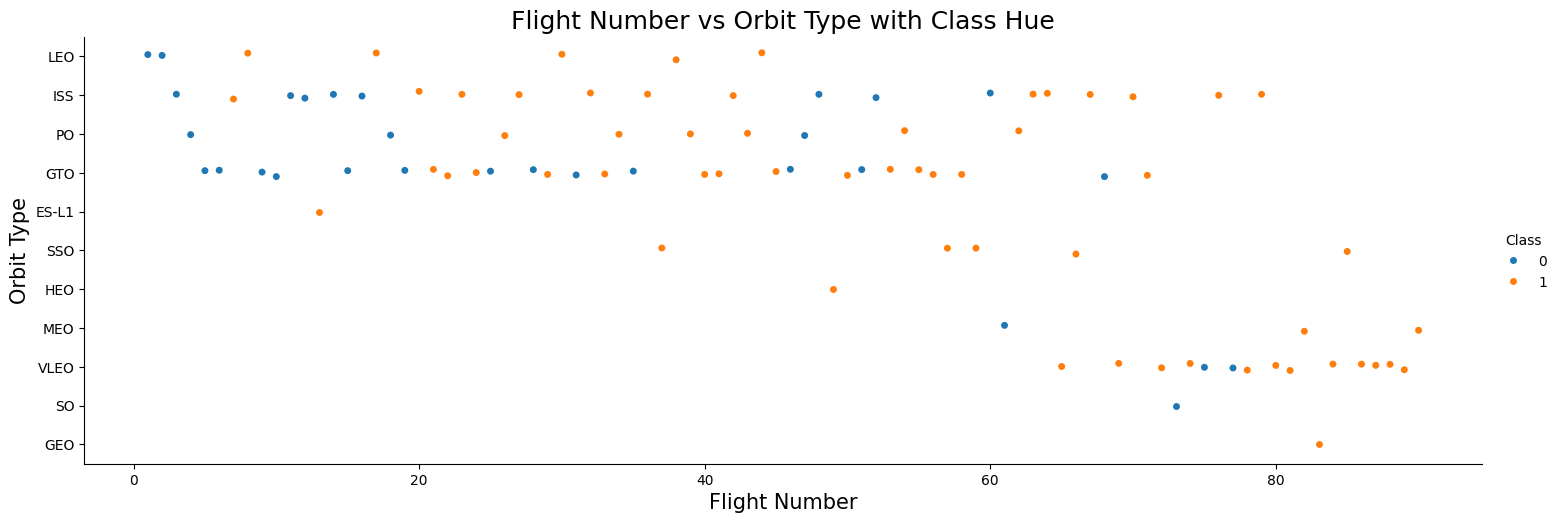

In [8]:
# Plot a scatter point chart with x axis to be FlightNumber and y axis to be the Orbit, and hue to be the class value

# Using catplot to create a scatter point chart
sns.catplot(x="FlightNumber", y="Orbit", hue="Class", data=df, aspect=3, kind="strip")

# Setting the labels and title
plt.xlabel("Flight Number", fontsize=15)
plt.ylabel("Orbit Type", fontsize=15)
plt.title("Flight Number vs Orbit Type with Class Hue", fontsize=18)

# Display the plot
plt.show()

You should see that in the LEO orbit the Success appears related to the number of flights; on the other hand, there seems to be no relationship between flight number when in GTO orbit.


Analysis of the Scatter Plot (Flight Number vs Orbit Type with Success Hue):

LEO Orbit:

In the LEO (Low Earth Orbit) category, there appears to be a positive correlation between flight number and success rate.
Earlier flights in LEO show more variability in success (a mix of successes and failures), whereas later flights show predominantly successful outcomes (Class=1).
This trend suggests improvement over time, likely due to increased experience, better technology, and refined operational procedures for LEO missions.

GTO Orbit:

In the GTO (Geostationary Transfer Orbit) category, there seems to be no clear relationship between flight number and success rate.
The plot shows a consistent pattern of mostly successful launches across all flight numbers, indicating that missions to GTO have generally been reliable from the start, possibly due to more mature technology for this orbit type.

Conclusion:

LEO orbit shows improvement with more successful missions as the flight number increases, indicating a learning curve and technological advancements over time.
GTO orbit demonstrates stable success across all flight numbers, implying that launches to GTO have been well-established with consistently high reliability.

### TASK  5: Visualize the relationship between Payload and Orbit type


Similarly, we can plot the Payload vs. Orbit scatter point charts to reveal the relationship between Payload and Orbit type


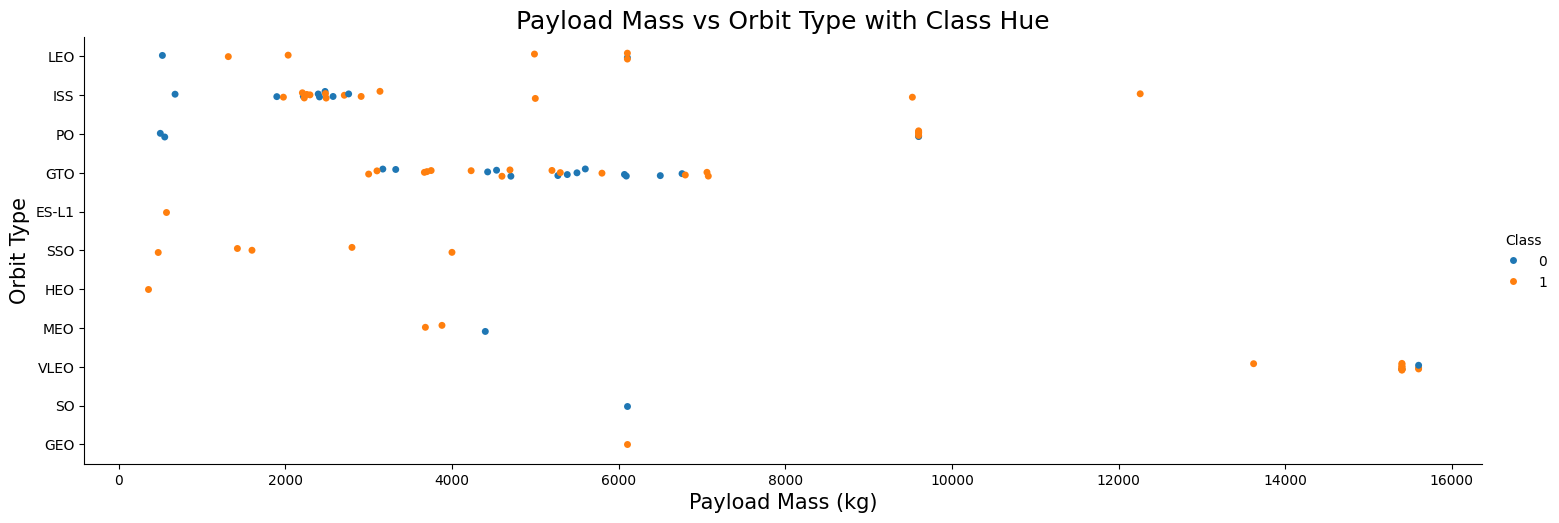

In [9]:
# Plot a scatter point chart with x axis to be Payload and y axis to be the Orbit, and hue to be the class value

# Using catplot to create a scatter point chart
sns.catplot(x="PayloadMass", y="Orbit", hue="Class", data=df, aspect=3, kind="strip")

# Setting the labels and title
plt.xlabel("Payload Mass (kg)", fontsize=15)
plt.ylabel("Orbit Type", fontsize=15)
plt.title("Payload Mass vs Orbit Type with Class Hue", fontsize=18)

# Display the plot
plt.show()

With heavy payloads the successful landing or positive landing rate are more for Polar,LEO and ISS.   

However for GTO we cannot distinguish this well as both positive landing rate and negative landing(unsuccessful mission) are both there here.




### TASK  6: Visualize the launch success yearly trend


You can plot a line chart with x axis to be <code>Year</code> and y axis to be average success rate, to get the average launch success trend. 


The function will help you get the year from the date:


In [10]:
# A function to Extract years from the date 
year=[]
def Extract_year(date):
    for i in df["Date"]:
        year.append(i.split("-")[0])
    return year
    

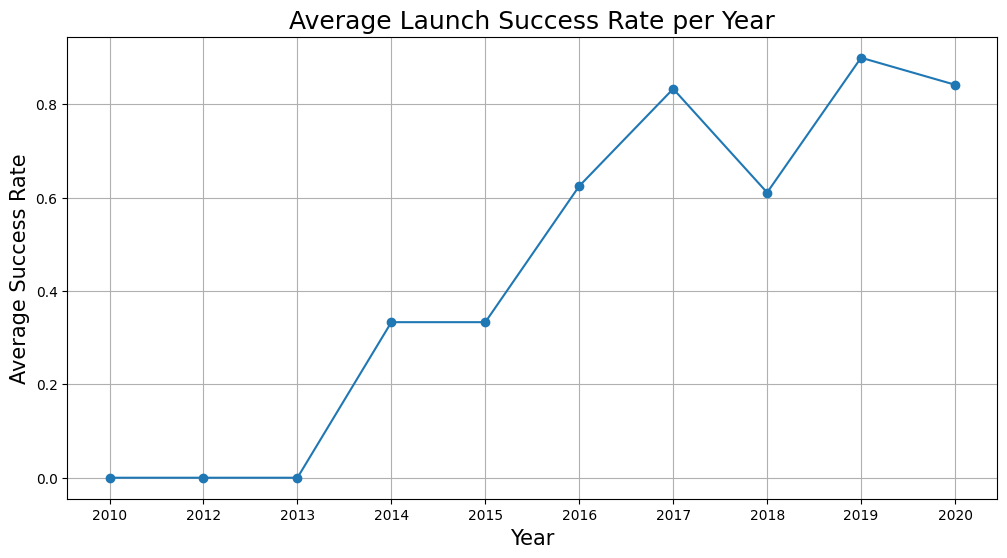

In [11]:
# Plot a line chart with x axis to be the extracted year and y axis to be the success rate

# Apply the function and add a new 'Year' column to the dataframe
df["Year"] = Extract_year(df["Date"])

# Group by 'Year' and calculate the average success rate
success_rate_per_year = df.groupby("Year")["Class"].mean().reset_index()

# Plotting the line chart
plt.figure(figsize=(12, 6))
plt.plot(success_rate_per_year["Year"], success_rate_per_year["Class"], marker='o')

# Setting labels and title
plt.xlabel("Year", fontsize=15)
plt.ylabel("Average Success Rate", fontsize=15)
plt.title("Average Launch Success Rate per Year", fontsize=18)

# Display the plot
plt.grid(True)
plt.show()

You can observe that the success rate since 2013 kept increasing till 2017 (stable in 2014) and after 2015 it started increasing.


## Features Engineering 


By now, you should obtain some preliminary insights about how each important variable would affect the success rate, we will select the features that will be used in success prediction in the future module.


In [12]:
features = df[['FlightNumber', 'PayloadMass', 'Orbit', 'LaunchSite', 'Flights', 'GridFins', 'Reused', 'Legs', 'LandingPad', 'Block', 'ReusedCount', 'Serial']]
features.head()

,FlightNumber,PayloadMass,Orbit,LaunchSite,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial
0,1,6104.959412,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0003
1,2,525.000000,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0005
2,3,677.000000,ISS,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0007
3,4,500.000000,PO,VAFB SLC 4E,1,False,False,False,NaN,1.0,0,B1003
4,5,3170.000000,GTO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B1004


 ### TASK  7: Create dummy variables to categorical columns


Use the function <code>get_dummies</code> and <code>features</code> dataframe to apply OneHotEncoder to the column <code>Orbits</code>, <code>LaunchSite</code>, <code>LandingPad</code>, and <code>Serial</code>. Assign the value to the variable <code>features_one_hot</code>, display the results using the method head. Your result dataframe must include all features including the encoded ones.


In [13]:
# HINT: Use get_dummies() function on the categorical columns
# Select the categorical columns to be encoded
categorical_columns = ["Orbit", "LaunchSite", "LandingPad", "Serial"]

# Apply get_dummies to the categorical columns
features_one_hot = pd.get_dummies(features[categorical_columns])

# Display the first 5 rows of the resulting dataframe
features_one_hot.head()

,Orbit_ES-L1,Orbit_GEO,Orbit_GTO,Orbit_HEO,Orbit_ISS,Orbit_LEO,Orbit_MEO,Orbit_PO,Orbit_SO,Orbit_SSO,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


### TASK  8: Cast all numeric columns to `float64`


Now that our <code>features_one_hot</code> dataframe only contains numbers cast the entire dataframe to variable type <code>float64</code>


In [14]:
# HINT: use astype function

# Cast all numeric columns to float64
features_one_hot = features_one_hot.astype('float64')

# Display the first 5 rows to confirm the data type conversion
features_one_hot.head()

,Orbit_ES-L1,Orbit_GEO,Orbit_GTO,Orbit_HEO,Orbit_ISS,Orbit_LEO,Orbit_MEO,Orbit_PO,Orbit_SO,Orbit_SSO,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
# Include all original features along with the encoded ones
features = pd.concat([features, features_one_hot], axis=1)

# Display the first 5 rows of the resulting dataframe
features.head()

,FlightNumber,PayloadMass,Orbit,LaunchSite,Flights,GridFins,Reused,Legs,LandingPad,Block,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,1,6104.959412,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,525.000000,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,677.000000,ISS,CCAFS SLC 40,1,False,False,False,NaN,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,500.000000,PO,VAFB SLC 4E,1,False,False,False,NaN,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,3170.000000,GTO,CCAFS SLC 40,1,False,False,False,NaN,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


We can now export it to a <b>CSV</b> for the next section,but to make the answers consistent, in the next lab we will provide data in a pre-selected date range. 


<code>features_one_hot.to_csv('dataset_part_3.csv', index=False)</code>


In [16]:
features_one_hot.to_csv('dataset_part_3.csv', index=False)

: 

## Authors


<a href="https://www.linkedin.com/in/joseph-s-50398b136/">Joseph Santarcangelo</a> has a PhD in Electrical Engineering, his research focused on using machine learning, signal processing, and computer vision to determine how videos impact human cognition. Joseph has been working for IBM since he completed his PhD.


<a href="https://www.linkedin.com/in/nayefaboutayoun/">Nayef Abou Tayoun</a> is a Data Scientist at IBM and pursuing a Master of Management in Artificial intelligence degree at Queen's University.


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By | Change Description      |
| ----------------- | ------- | ---------- | ----------------------- |
| 2021-10-12        | 1.1     | Lakshmi Holla     | Modified markdown |
| 2020-09-20        | 1.0     | Joseph     | Modified Multiple Areas |
| 2020-11-10       | 1.1    | Nayef      | updating the input data |


Copyright © 2020 IBM Corporation. All rights reserved.
